In [3]:
%load_ext autoreload
%autoreload 2

import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import sys

# this is needed when importing from the notebooks folder
sys.path.append('../')
from lobster import Lightcurve
from lobster.filtering import sin4_filter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


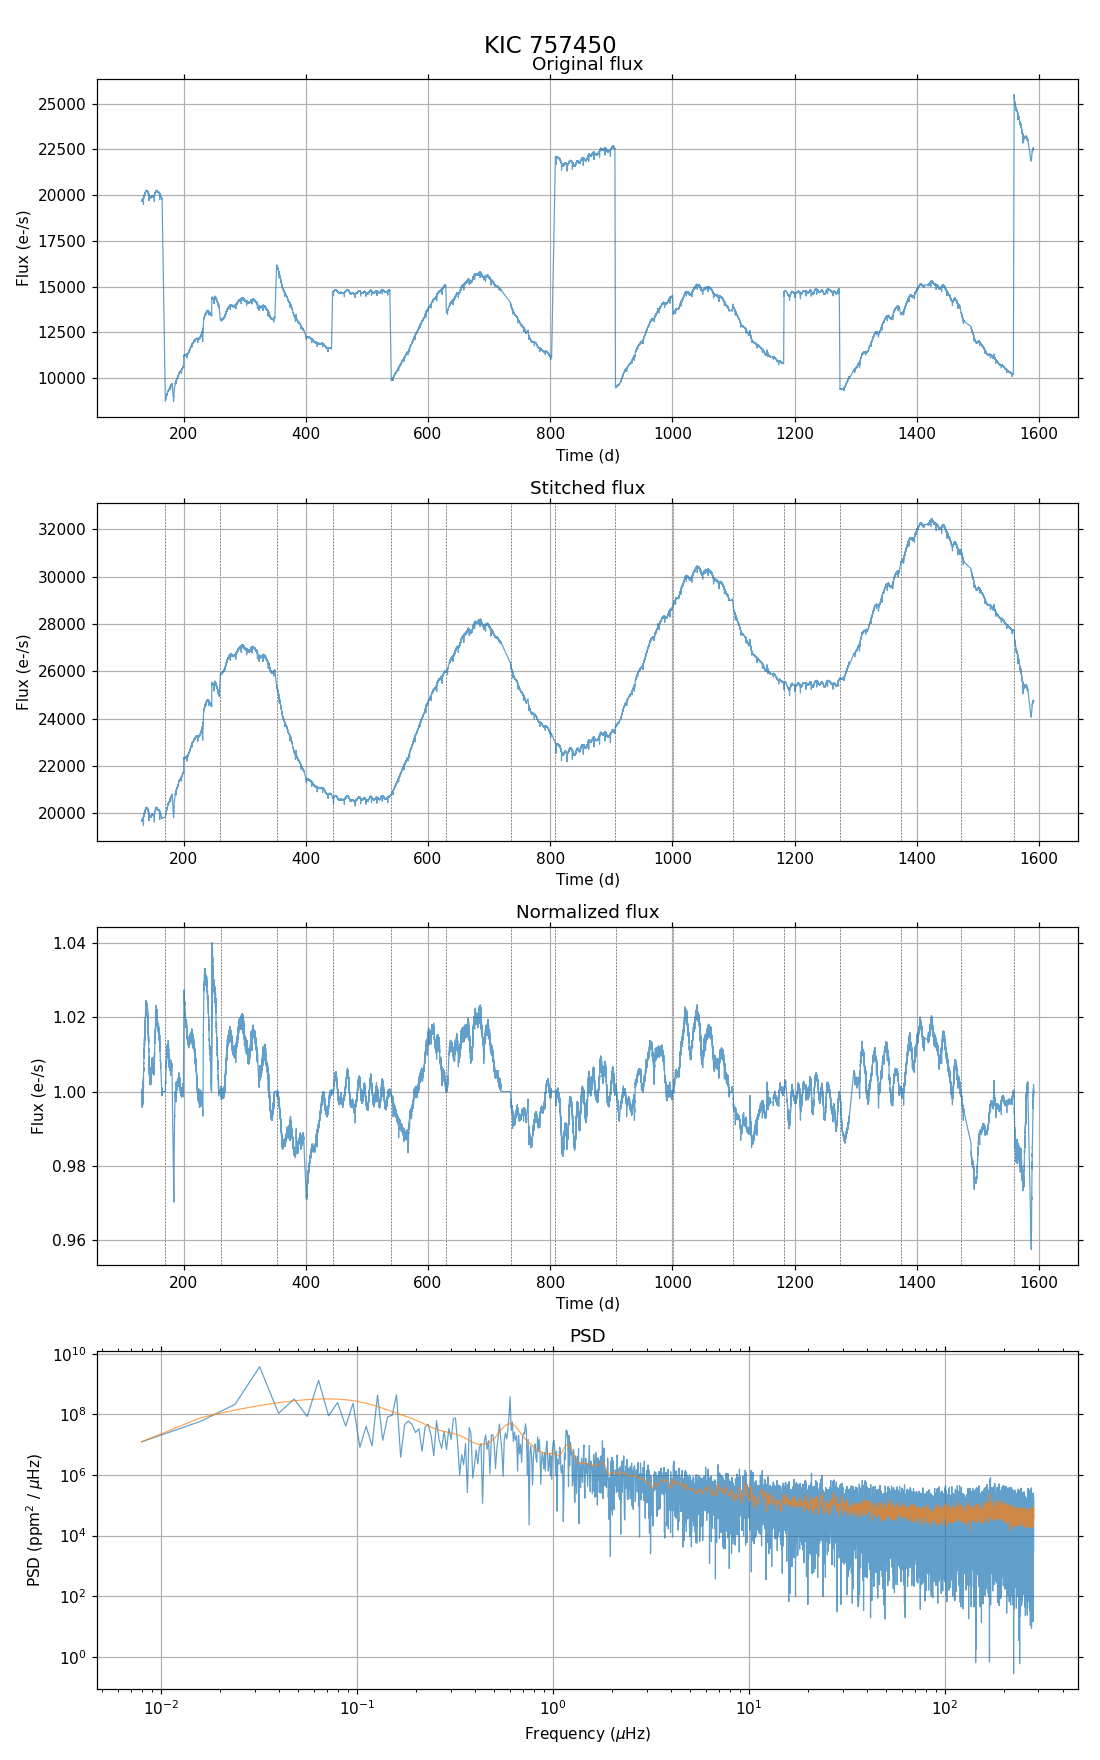

In [4]:
%matplotlib widget

lc = Lightcurve()
lc.load_kbonus("../../kbonus/data/0007/000757450/hlsp_kbonus-bkg_kepler_kepler_kic-000757450_kepler_v1.0_lc.fits")

plt.close('all')
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, figsize=(10,16), dpi=110)

lc.remove_quality()

lc.plot_flux(ax=ax0, title="Original flux")

lc.stitch(max_gap=16)

lc.plot_flux(ax=ax1, title="Stitched flux")
lc.plot_jumps(ax1)

normalisation = lambda x: x.normalize_sin4_filter(.5)
lc.remove_outliers("sigma_clipping", threshold=3, after_normalisation=normalisation)

lc.normalize_sin4_filter(50, section_mode="section")
lc.plot_flux(ax=ax2, title="Normalized flux")
lc.plot_jumps(ax2)

lc.resample()
lc.flux_to_ppm()
lc.plot_psd(ax=ax3)
lc.plot_psd(ax=ax3, psd_filter=lambda x: sin4_filter(x, 41))

fig.suptitle(lc.object_name, fontsize=15)
fig.tight_layout()